In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the dataset

In [3]:
curr_app=pd.read_csv("application_train.csv")
prev_app=pd.read_csv("previous_application.csv")

In [4]:
curr_app.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100113,0,Cash loans,M,Y,N,0,76500.0,135000.0,6696.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
96,100114,0,Cash loans,F,N,Y,0,135000.0,284400.0,22599.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
97,100115,0,Cash loans,F,N,N,0,90000.0,315000.0,14683.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
98,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_app.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1851241,415052,Consumer loans,9675.855,46476.0,48775.5,0.0,46476.0,TUESDAY,16,...,Consumer electronics,6.0,high,POS household with interest,365243.0,-1337.0,-1187.0,-1187.0,-1181.0,0.0
96,2030030,133853,Consumer loans,7253.055,104809.5,121410.0,0.0,104809.5,SATURDAY,14,...,Consumer electronics,18.0,low_action,POS household without interest,365243.0,-315.0,195.0,365243.0,365243.0,0.0
97,1935914,191576,Consumer loans,NaN,23400.0,23400.0,NaN,23400.0,SATURDAY,9,...,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.5,113215.5,0.0,113215.5,SUNDAY,12,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
curr_app.info(122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
curr_app.select_dtypes(include='int').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   SK_ID_CURR                   307511 non-null  int64
 1   TARGET                       307511 non-null  int64
 2   CNT_CHILDREN                 307511 non-null  int64
 3   DAYS_BIRTH                   307511 non-null  int64
 4   DAYS_EMPLOYED                307511 non-null  int64
 5   DAYS_ID_PUBLISH              307511 non-null  int64
 6   FLAG_MOBIL                   307511 non-null  int64
 7   FLAG_EMP_PHONE               307511 non-null  int64
 8   FLAG_WORK_PHONE              307511 non-null  int64
 9   FLAG_CONT_MOBILE             307511 non-null  int64
 10  FLAG_PHONE                   307511 non-null  int64
 11  FLAG_EMAIL                   307511 non-null  int64
 12  REGION_RATING_CLIENT         307511 non-null  int64
 13  REGION_RATING_CLIENT_W_CITY  

In [9]:
curr_app.select_dtypes(include='float').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   OWN_CAR_AGE                   104582 non-null  float64
 7   CNT_FAM_MEMBERS               307509 non-null  float64
 8   EXT_SOURCE_1                  134133 non-null  float64
 9   EXT_SOURCE_2                  306851 non-null  float64
 10  EXT_SOURCE_3                  246546 non-null  float64
 11  APARTMENTS_AVG                151450 non-null  float64
 12  BASEMENTAREA_AVG              127568 non-nul

In [10]:
curr_app.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

In [11]:
print(prev_app.select_dtypes(include='object').shape[1])
print(prev_app.select_dtypes(include='float').shape[1])
print(prev_app.select_dtypes(include='int').shape[1])


16
15
6


In [12]:
print(curr_app.shape)
print(prev_app.shape)

(307511, 122)
(1670214, 37)


In [13]:
# finding missing values
(curr_app.isnull().mean()*100).sort_values(ascending=False).head(70)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
CNT_CHILDREN                 0.000000
FLAG_DOCUMENT_8              0.000000
NAME_CONTRACT_TYPE           0.000000
Length: 70, dtype: float64

In [51]:
# value wise default percentage
def value_wise_def_per(df,col):
    datframe=pd.DataFrame(columns=['value','default_percent'])
    for val in df[col].unique():
        total=df[df[col]==val].shape[0]
        def_total=df[(df[col]==val) & (df['TARGET']==1)].shape[0]
        datframe=datframe.append({'value':val,'default_percent':(def_total*100/total)},ignore_index=True)
    return datframe.sort_values(by='default_percent',ascending=False)        
        

# chacking data imbalance

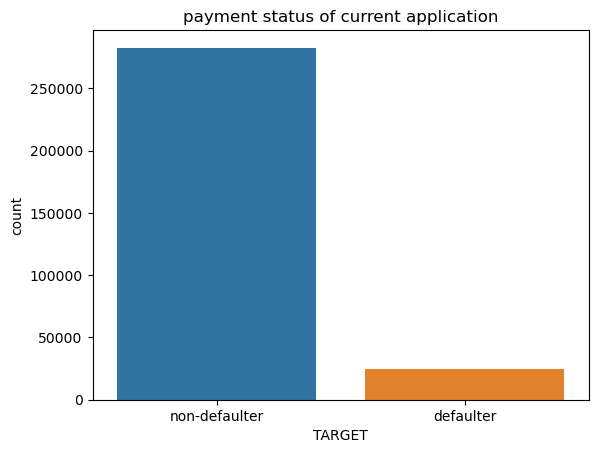

In [15]:
plt.title("payment status of current application")
sns.countplot(curr_app['TARGET'])
plt.xticks([0,1],['non-defaulter','defaulter'])
plt.show()

In [16]:
# geeting the numbers of deafulters and non-defaulters
non_default=curr_app[curr_app['TARGET']==0].shape[0]
default=curr_app[curr_app['TARGET']==1].shape[0]
print("no of defaulters",default)
print("no of non-defaulter",non_default)


no of defaulters 24825
no of non-defaulter 282686


In [17]:
#percentage of defaulter
print("% of deafulter",(default*100/(non_default+default)))

% of deafulter 8.072881945686495


In [18]:
curr_app[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_11']]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_11
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
307506,0,0,0
307507,0,1,0
307508,0,1,0
307509,0,1,0


# SEGMENTING THE COLUMNS

SEGMENT 1:CHECKING THE DOCUMENTS SUBMITTED BY THE APPLICANTS

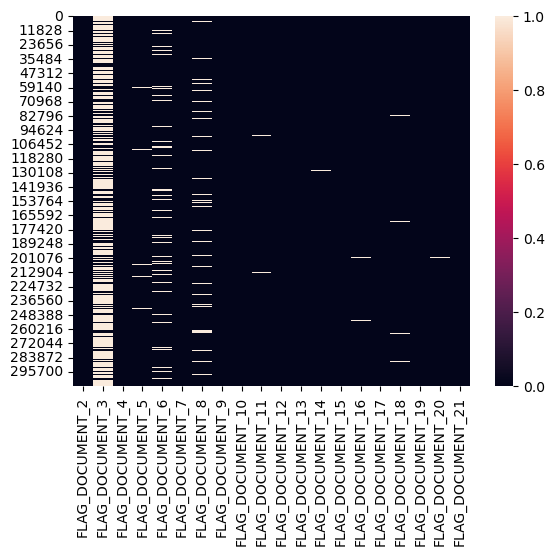

In [19]:
start_index=curr_app.columns.get_loc("FLAG_DOCUMENT_2")
end_index=curr_app.columns.get_loc("FLAG_DOCUMENT_21")+1
sns.heatmap(curr_app.iloc[:,start_index:end_index])
plt.show()



In [20]:
#analyzing FLAG_DOCUMENT_3
curr_app['FLAG_DOCUMENT_3'].value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

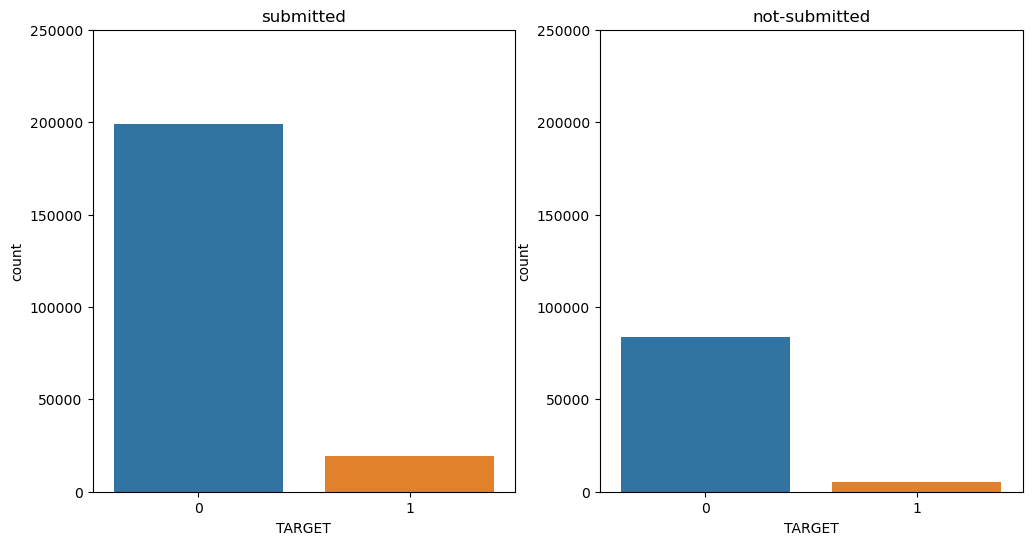

In [21]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,title="submitted",ylim=(0,250000))
ax2=fig.add_subplot(1,2,2,title='not-submitted',ylim=(0,250000))
sns.countplot(curr_app[curr_app['FLAG_DOCUMENT_3']==1]['TARGET'],ax=ax1)
sns.countplot(curr_app[curr_app['FLAG_DOCUMENT_3']==0]['TARGET'],ax=ax2)
plt.show()


SECTION 2-HOUSING INFORMATION OF APPLICANTS

In [22]:
curr_app.columns[0:100]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APART

In [23]:
start_index=curr_app.columns.get_loc('APARTMENTS_AVG')
end_index=curr_app.columns.get_loc('EMERGENCYSTATE_MODE')
apartm_info=curr_app.iloc[:,start_index:end_index]


In [24]:
apartm_info['TARGET']=curr_app['TARGET']
apartm_info['NAME_HOUSING_TYPE']=curr_app['NAME_HOUSING_TYPE']
apartm_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [25]:
(apartm_info.isnull().mean()*100).sort_values(ascending=True)

NAME_HOUSING_TYPE                0.000000
TARGET                           0.000000
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
HOUSETYPE_MODE                  50.176091
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MODE                 50.193326
LIVINGAREA_MEDI                 50.193326
ENTRANCES_AVG                   50.348768
ENTRANCES_MODE                  50.348768
ENTRANCES_MEDI                  50.348768
APARTMENTS_MEDI                 50.749729
APARTMENTS_AVG                  50.749729
APARTMENTS_MODE                 50.749729
WALLSMATERIAL_MODE              50.840783
ELEVATORS_MODE                  53.295980
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
NONLIVINGAREA_MEDI              55

COMMENTS:
except NAME_HOUSING_TYPE ,TARGET all have high missing value percentage.All those can be dropped


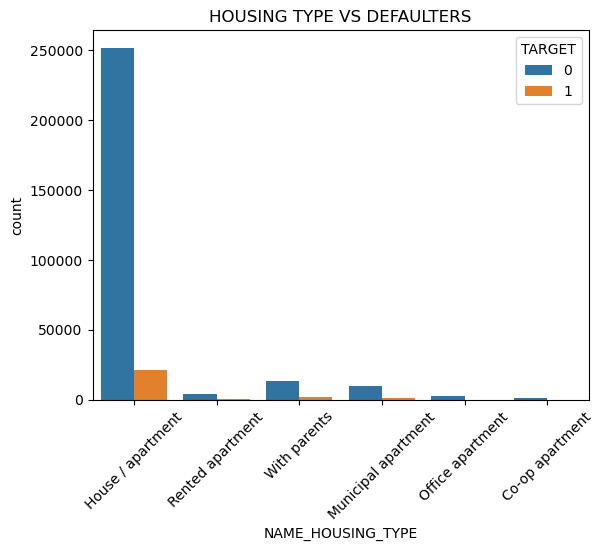

In [26]:
plt.title("HOUSING TYPE VS DEFAULTERS")
sns.countplot(apartm_info['NAME_HOUSING_TYPE'],hue=apartm_info['TARGET'])
plt.xticks(rotation=45)
plt.show()

In [27]:
value_wise_def_per(apartm_info,'NAME_HOUSING_TYPE')

,value,default percent,default_percent
1,Rented apartment,NaN,12.313051
2,With parents,NaN,11.698113
3,Municipal apartment,NaN,8.539748
5,Co-op apartment,NaN,7.932264
0,House / apartment,NaN,7.795711
4,Office apartment,NaN,6.572411


SEGMENT3:SOCIAL CIRCLE INFORMATION

In [28]:
start_index = curr_app.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_index = curr_app.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle = curr_app.iloc[:, start_index:end_index+1]

In [29]:
social_circle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [30]:
social_circle.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

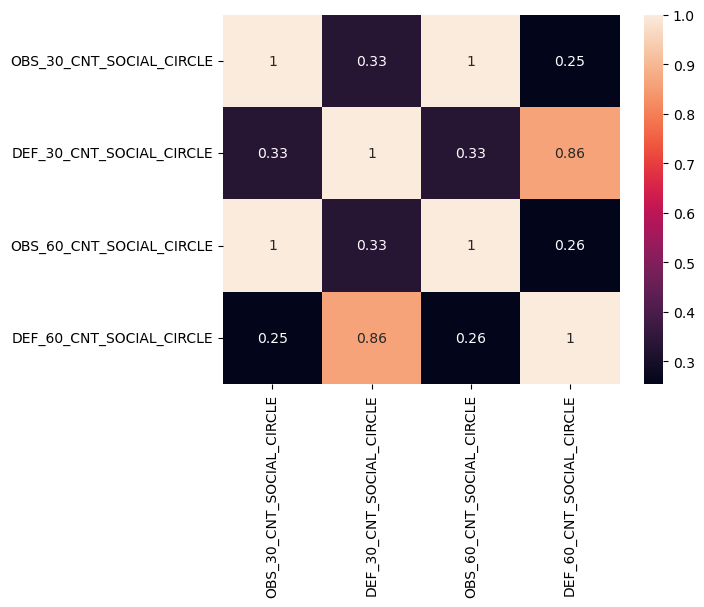

In [31]:
sns.heatmap(social_circle.corr(), annot=True)

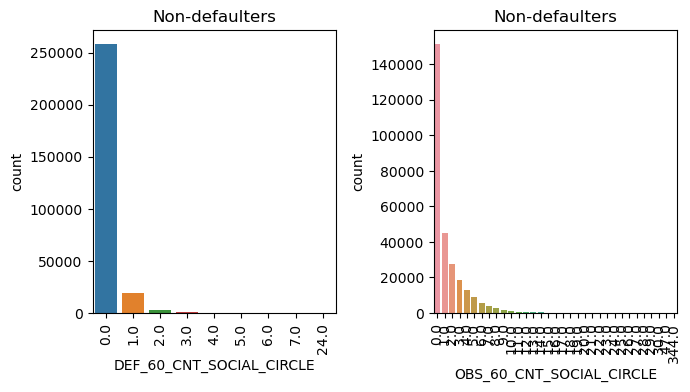

In [32]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(curr_app[curr_app['TARGET']==0][j])
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

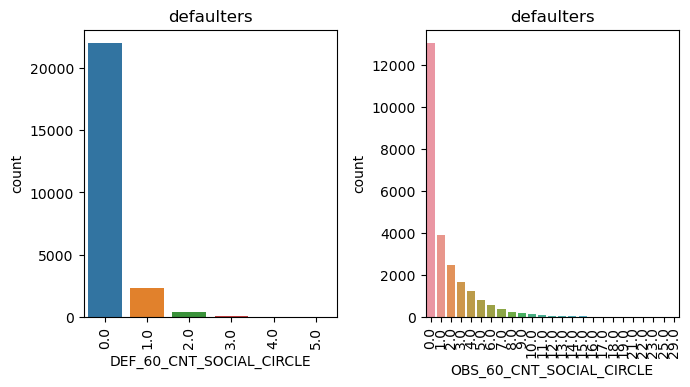

In [33]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(curr_app[curr_app['TARGET']==1][j])
    plt.title("defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

Segment 4 : Region related data

In [34]:
start_index = curr_app.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_index = curr_app.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_data = curr_app.iloc[:, start_index:end_index+1]

In [35]:
region_data

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
307506,0,0,0,0,0,0
307507,0,0,0,0,0,0
307508,0,0,0,0,1,1
307509,0,0,0,1,1,0


In [36]:
region_data['REGION_RATING_CLIENT'] = curr_app['REGION_RATING_CLIENT']
region_data['REGION_RATING_CLIENT_W_CITY'] = curr_app['REGION_RATING_CLIENT_W_CITY']
region_data["TARGET"] = curr_app["TARGET"]

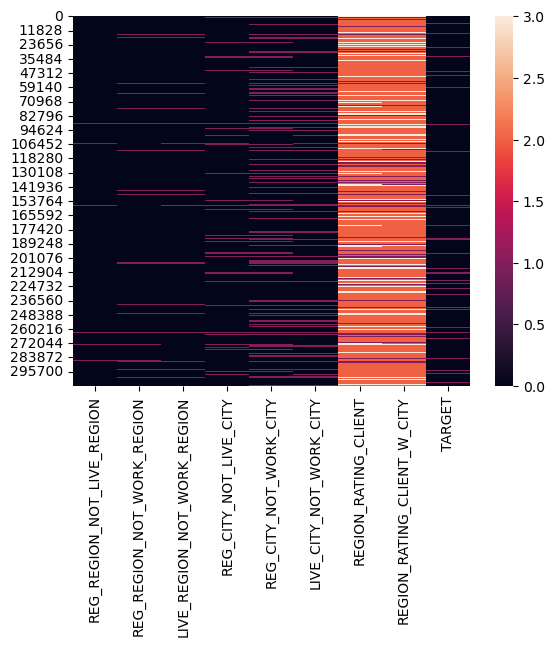

In [37]:
sns.heatmap(region_data)
plt.show()

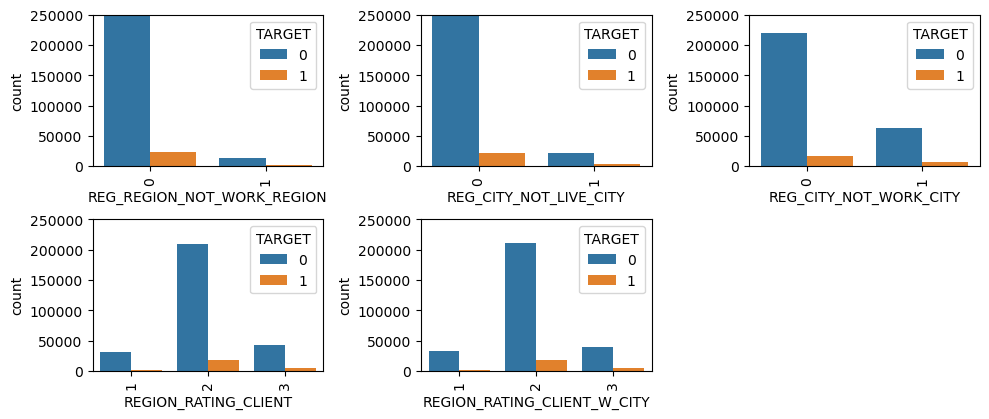

In [38]:
# visualising each region data columns by target
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(curr_app[j], hue=curr_app["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

Segment 5: Contact Related Information

In [90]:
contact_data = curr_app[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]


In [91]:
contact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              299463 non-null  int64  
 1   FLAG_EMP_PHONE          299463 non-null  int64  
 2   FLAG_WORK_PHONE         299463 non-null  int64  
 3   FLAG_CONT_MOBILE        299463 non-null  int64  
 4   FLAG_PHONE              299463 non-null  int64  
 5   FLAG_EMAIL              299463 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  299462 non-null  float64
 7   TARGET                  299463 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 20.6 MB


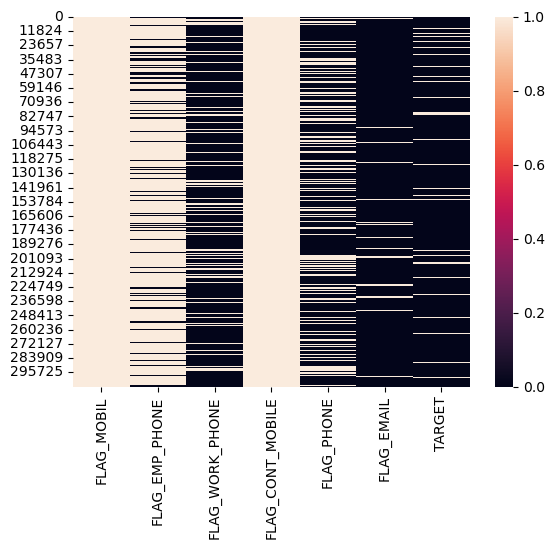

In [92]:
plt.figure()
sns.heatmap(contact_data.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

COMMENTS:
All the features in contact_data are categorical (0 and 1)

As there is no similarity of patterns of TARGET value with other features so we are assuming the feature are not useful for analysis.

Hence all of the features can be removed.

Segment 6: Asset Details

In [93]:
curr_app[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     299463 non-null  object 
 1   FLAG_OWN_REALTY  299463 non-null  object 
 2   OWN_CAR_AGE      99893 non-null   float64
 3   TARGET           299463 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 11.4+ MB


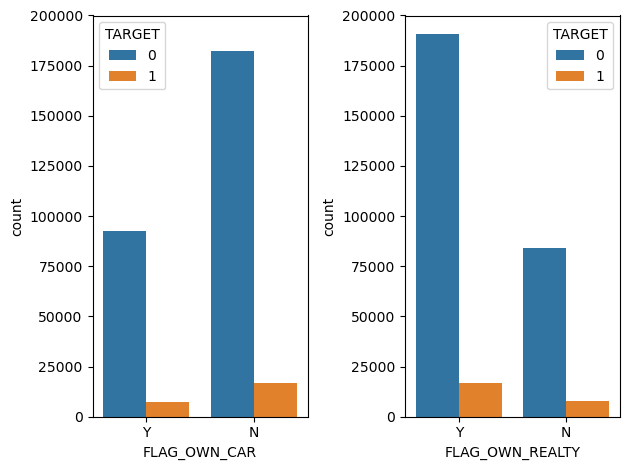

In [94]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(curr_app['FLAG_OWN_CAR'], hue=curr_app['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(curr_app['FLAG_OWN_REALTY'], hue=curr_app['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [95]:
value_wise_def_per(curr_app, 'FLAG_OWN_CAR')

,value,default_percent
0,N,8.540533
1,Y,7.377599


In [100]:
value_wise_def_per(curr_app,'FLAG_OWN_REALTY')

,value,default_percent
1,N,8.409230
0,Y,8.039158


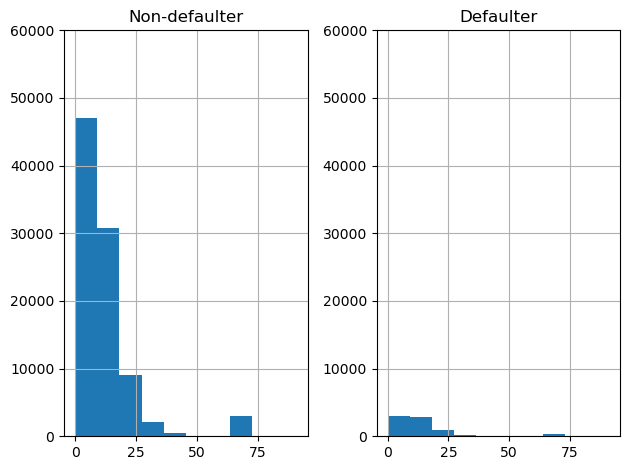

In [101]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Defaulter")

curr_app[curr_app['TARGET']==0]['OWN_CAR_AGE'].hist(bins=10, ax=ax1)
curr_app[curr_app['TARGET']==1]['OWN_CAR_AGE'].hist(bins=10, ax=ax2)

plt.tight_layout()

plt.show()


SEGMENT 7:FAMILY INFORMATION

In [39]:
pd.options.display.max_columns = None

In [40]:
curr_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [41]:
curr_app[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [45]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS

curr_app = curr_app.dropna(subset=['CNT_FAM_MEMBERS']) 
curr_app[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [46]:
# CNT_FAM_MEMBERS converting to Integer

curr_app['CNT_FAM_MEMBERS'] = curr_app['CNT_FAM_MEMBERS'].astype(int)
curr_app[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


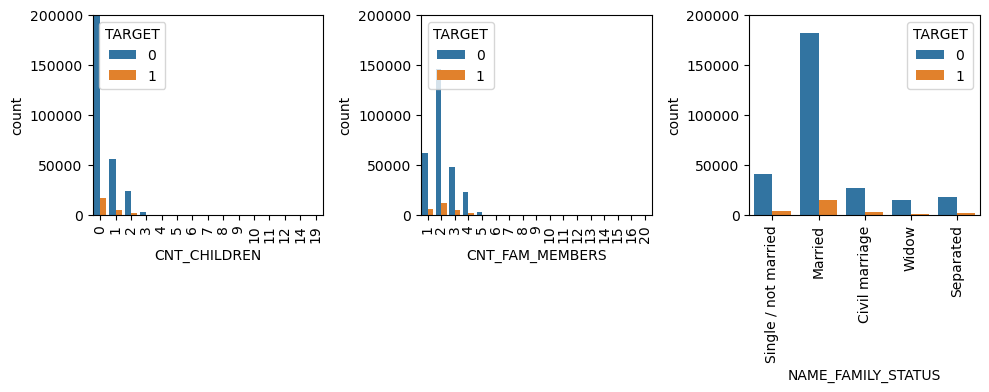

In [48]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    sns.countplot(curr_app[j], hue=curr_app["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [52]:

value_wise_def_per(curr_app,'NAME_FAMILY_STATUS')

,value,default_percent
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [53]:
value_wise_def_per(curr_app,"CNT_CHILDREN")

,value,default_percent
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [54]:
value_wise_def_per(curr_app,"CNT_FAM_MEMBERS")

,value,default_percent
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [55]:
curr_app['CNT_CHILDREN'].value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [56]:
curr_app['CNT_FAM_MEMBERS'].value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [57]:
curr_app['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

Segment 8: Education and Occupation Info

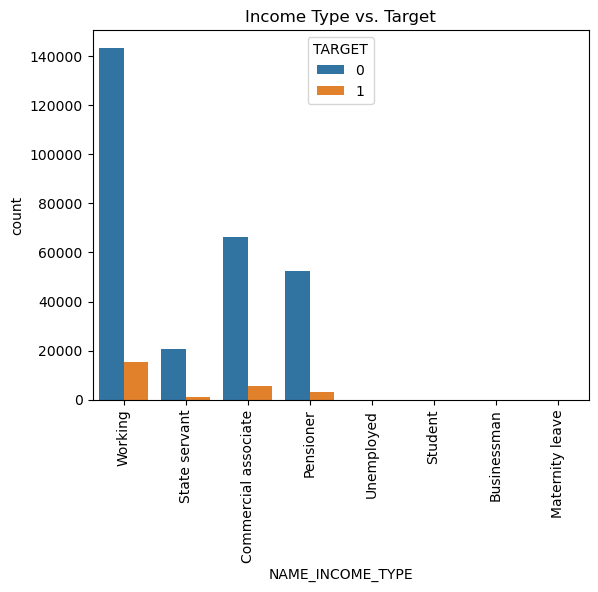

In [58]:
plt.figure()
sns.countplot(curr_app['NAME_INCOME_TYPE'], hue=curr_app["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [60]:
value_wise_def_per(curr_app,'NAME_INCOME_TYPE')

,value,default_percent
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [62]:
curr_app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [63]:
value_wise_def_per(curr_app,'NAME_EDUCATION_TYPE')

,value,default_percent
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


COMMENTS:
1.Applicants having lower secondary degree are more defaulters

In [65]:
curr_app['OCCUPATION_TYPE'].isnull().sum()

96391

In [67]:
# filling the null values with unknown
curr_app['OCCUPATION_TYPE'].fillna("unknown",inplace=True)

In [68]:
curr_app['OCCUPATION_TYPE'].value_counts()

unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [69]:
value_wise_def_per(curr_app, 'OCCUPATION_TYPE')

,value,default_percent
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


In [70]:
curr_app['CODE_GENDER'].isnull().sum()

0

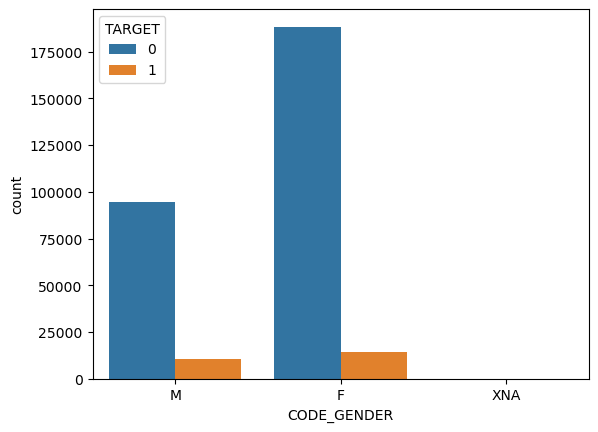

In [71]:
sns.countplot(curr_app['CODE_GENDER'], hue=curr_app["TARGET"])
plt.show()


In [73]:
# Converting DAYS_BIRTH to age
curr_app["Age"] = curr_app.DAYS_BIRTH//(-365.25) 
curr_app[["Age"]].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [74]:
# Dropping the column "days birth" as new column will be used for analysis

curr_app.drop("DAYS_BIRTH", inplace=True, axis=1)

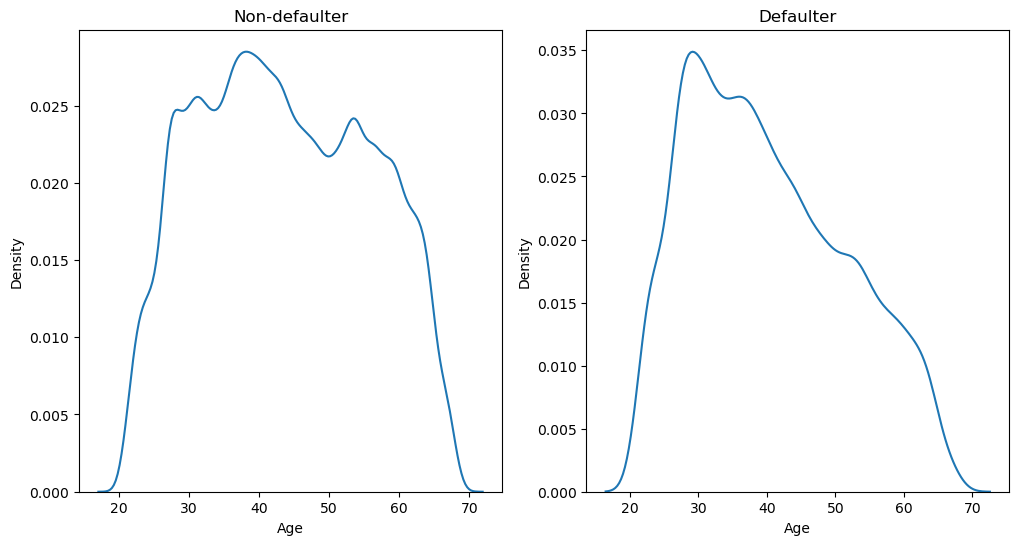

In [76]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(curr_app[curr_app["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(curr_app[curr_app["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

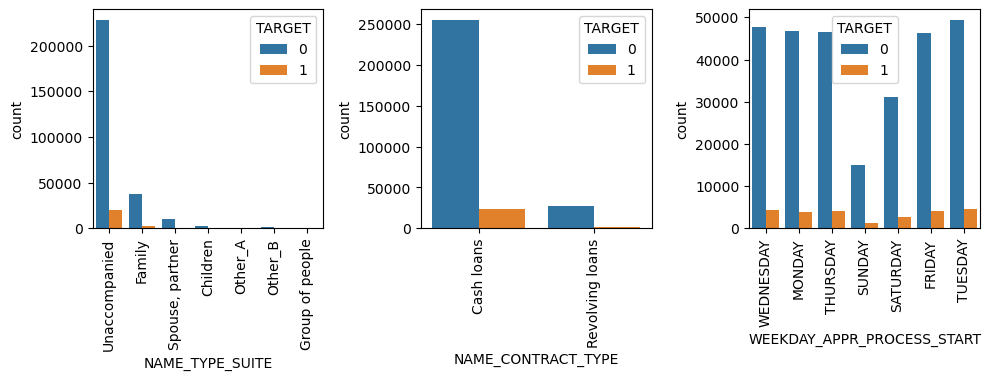

In [77]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(curr_app[j], hue=curr_app["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

# Income and Annuity

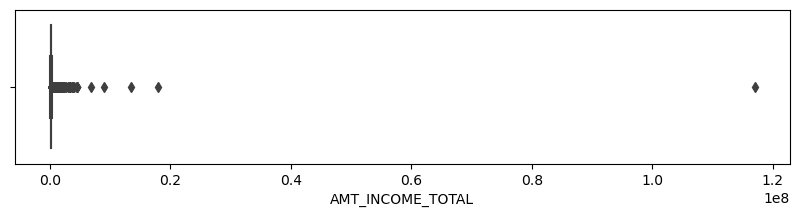

In [78]:
plt.figure(figsize=(10,2))
sns.boxplot(curr_app['AMT_INCOME_TOTAL'])
plt.show()

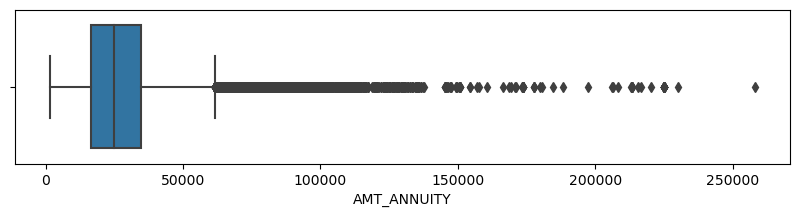

In [79]:
plt.figure(figsize=(10,2))
sns.boxplot(curr_app['AMT_ANNUITY'])
plt.show()


In [80]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_INCOMRE_TOTAL

curr_app = curr_app[curr_app['AMT_ANNUITY'] < np.nanpercentile(curr_app['AMT_ANNUITY'], 99)]
curr_app = curr_app[curr_app['AMT_INCOME_TOTAL'] < np.nanpercentile(curr_app['AMT_INCOME_TOTAL'], 99)]

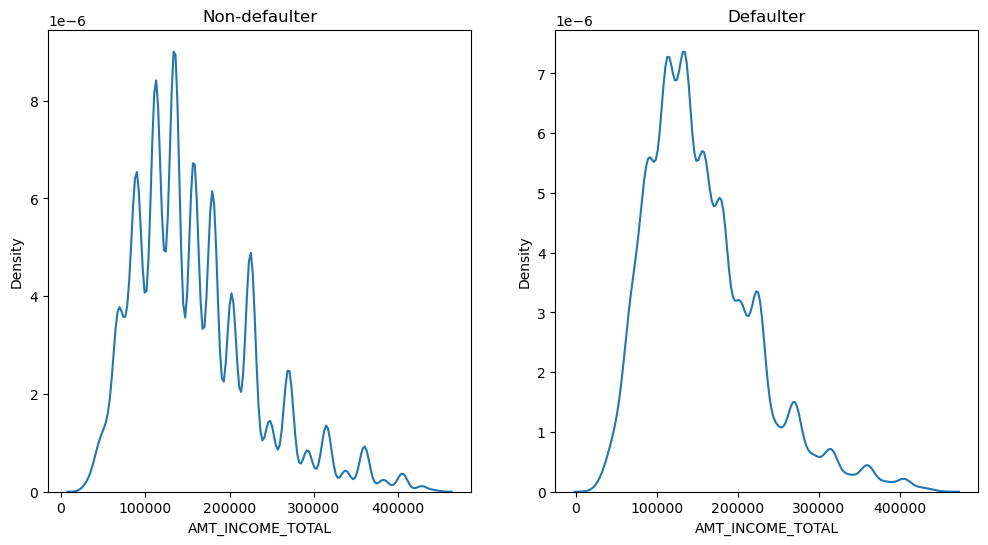

In [81]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(curr_app[curr_app["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(curr_app[curr_app["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

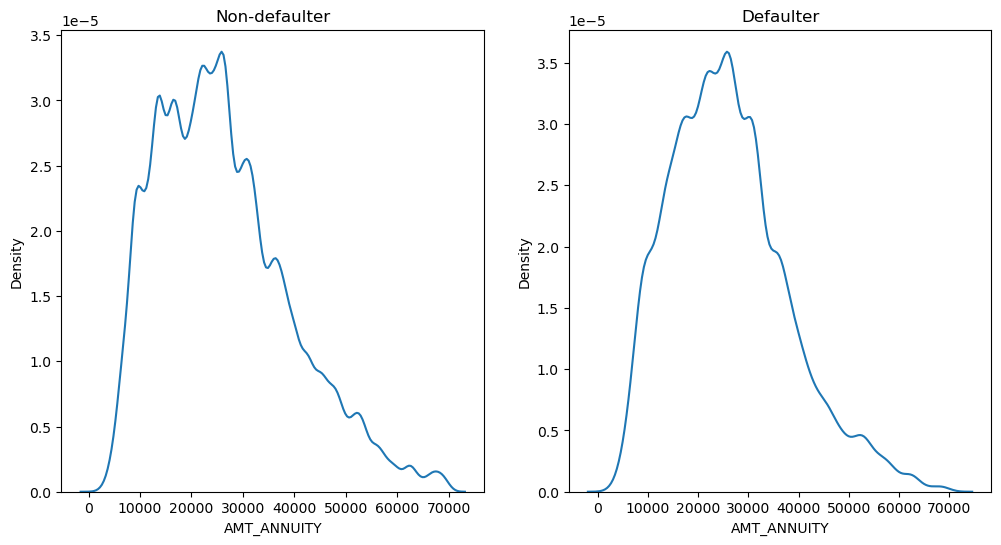

In [82]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(curr_app[curr_app["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(curr_app[curr_app["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

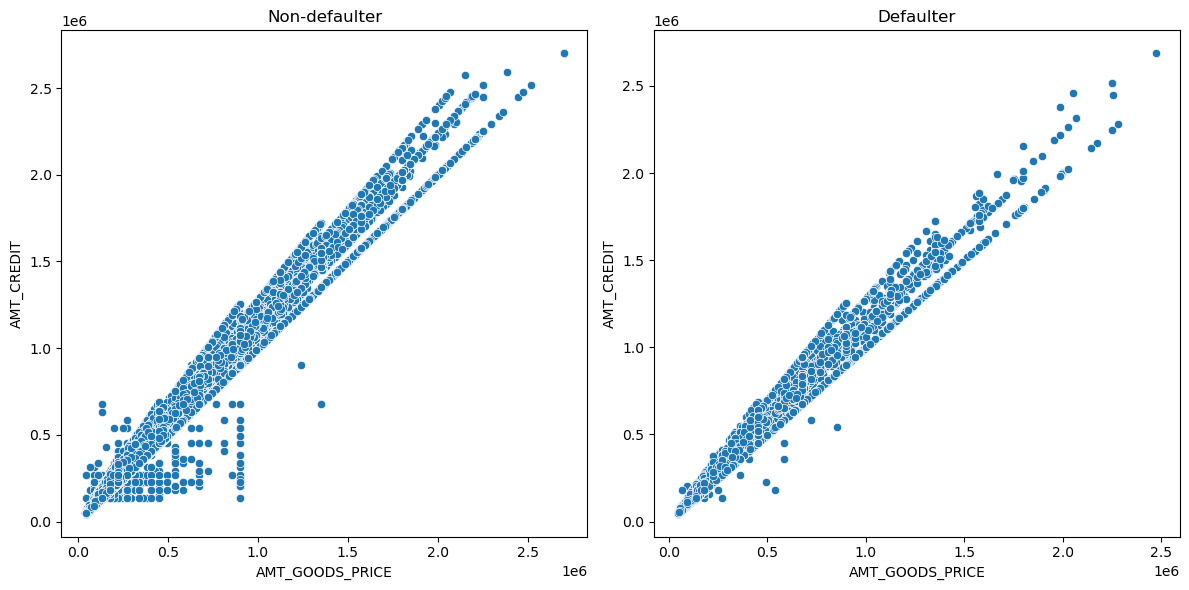

In [84]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(curr_app[curr_app["TARGET"] == 0]['AMT_GOODS_PRICE'], curr_app[curr_app["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(curr_app[curr_app["TARGET"] == 1]['AMT_GOODS_PRICE'], curr_app[curr_app["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

In [85]:
curr_app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  130064 non-null  float64
 1   EXT_SOURCE_2  298814 non-null  float64
 2   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(3)
memory usage: 9.1 MB


In [87]:
curr_app[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_3
count,130064.000000,240038.000000,240038.000000
mean,0.499680,0.510843,0.510843
std,0.211062,0.194880,0.194880
min,0.014568,0.000527,0.000527
25%,0.331224,0.370650,0.370650
50%,0.502826,0.535276,0.535276
75%,0.672288,0.669057,0.669057
max,0.962693,0.896010,0.896010


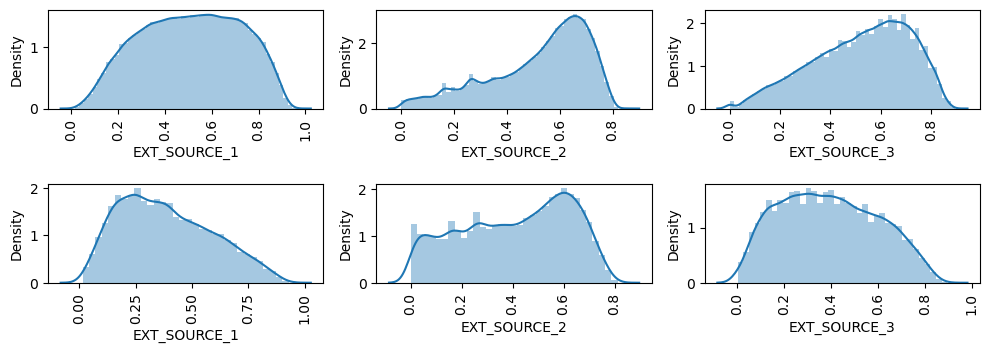

In [88]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 3:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(curr_app[curr_app["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

# Top 10 correlation for Defaulters

In [102]:
defaulters=curr_app[curr_app['TARGET']==1]

In [106]:
defaulters_corr = defaulters.corr()
round(defaulters_corr, 2)

corr_list = defaulters_corr.unstack()

In [107]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998262
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998251
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998129
COMMONAREA_MEDI           COMMONAREA_AVG              0.998041
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997963
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_AVG     0.997934
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997701
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE    0.997359
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997304
ENTRANCES_AVG             ENTRANCES_MEDI              0.996697
dtype: float64

# Top 10 Correlation for Non-defaulters

In [108]:
non_defaulters=curr_app[curr_app['TARGET']==0]

In [111]:
non_defaulters_corr = non_defaulters.corr()
round(non_defaulters_corr, 2)

corr_list = non_defaulters_corr.unstack()

In [112]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998558
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998511
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997306
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997065
ENTRANCES_AVG             ENTRANCES_MEDI              0.996991
ELEVATORS_AVG             ELEVATORS_MEDI              0.996205
COMMONAREA_MEDI           COMMONAREA_AVG              0.995914
LIVINGAREA_AVG            LIVINGAREA_MEDI             0.995523
APARTMENTS_MEDI           APARTMENTS_AVG              0.995126
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.994191
dtype: float64

# Top 5 important columns
-Family Info: (Important driving features : 'CNT_FAM_MEMBERS', 'CNT_CHILDREN') i. Most of the applicants are married (and/or) no children (and/or) 2 family members. ii. Applicants with relatively more number of children (and/or) family members have higher default percentage. (For some of the cases where count children/family members is high, and the default rate is very high or very low. This cases cannot be considered for analysis as number of applicants having a large family is very low.)

Education and Occupation Info: (Important driving features :'NAME_INCOME_TYPE', 'OCCUPATION_TYPE')
Most of the applicants are working.
Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

CODE_GENDER

Female applicants are more than male applicants
Defauter percentage is higher for male applicants
XNA values can be replaced with "Unknown"
DAYS_BIRTH

A derived column 'Age' from this gave useful information.
People of age 25-35 have higher default rate
Default cases are less for applicants more than 40 years old.
'EXT_SOURCE_1' and 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters. This can be important features.



# Summary :
This data is highly imbalanced as number of defaulter is very less in total population.
'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, 'EXT_SOURCE_1' and 'EXT_SOURCE_3' are some of the important driving factors.

Documents : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment.
Majority of the applicants did not submit any documents apart from DOCUMENT_3. FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.

Housing: All of the features considered have very high (47-70%) missing data percentage. Hence all these features can be dropped. Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that
i. Most of the applicants live in House/Apartment ii. Applicants living with their parents or in rented apartment have higher rate of default.

Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

Regional Info: Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same

Contact Info : Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.

Asset Info :

i. Most of the applicants own realty ii. Most of the applicants do not own cars iii. People not owning reality and car and have a slightly higher default rate than the people who own reality and car